In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
import pandas as pd

In [3]:
#data = pd.read_csv('/content/drive/My Drive/solar-forecasting/data/meteo_galicia.csv', sep=';', parse_dates=['fecha'], decimal=',',
#                 infer_datetime_format=True, low_memory=False, index_col='fecha').sort_index()

In [4]:
data = pd.read_csv('./data/meteo_galicia.csv', sep=';', parse_dates=['fecha'], decimal=',',
                 infer_datetime_format=True, low_memory=False, index_col='fecha').sort_index()

In [5]:
data

,estacionid,lat,lon,tamb,hum,pres,prec,rad,vvien,tipodered
fecha,,,,,,,,,,
2019-01-01 00:10:00,20284,42.4044,-8.6730,5.4,0,1022.0,0.0,0.0,0.7,OFICIAL
2019-01-01 00:10:00,20233,42.3554,-7.0086,7.3,0,892.1,0.0,0.0,3.5,OFICIAL
2019-01-01 00:10:00,20218,43.1626,-7.2826,9.2,0,955.0,0.0,0.0,0.0,OFICIAL
2019-01-01 00:10:00,20217,42.7071,-7.0471,8.5,0,882.5,0.0,1.0,6.3,OFICIAL
2019-01-01 00:10:00,20221,43.5407,-7.0830,5.3,0,1027.0,0.0,0.0,2.8,OFICIAL
...,...,...,...,...,...,...,...,...,...,...
2019-06-01 19:40:00,20249,42.2987,-7.5907,25.0,0,909.0,0.0,402.0,2.0,OFICIAL
2019-06-01 19:40:00,20259,42.1630,-7.0896,27.0,0,922.0,0.0,374.0,3.0,OFICIAL
2019-06-01 19:40:00,20255,42.4631,-6.9295,30.0,0,NaN,0.0,378.0,0.0,OFICIAL


In [6]:
data = data.drop(columns=['tipodered', 'hum'])

In [7]:
estaciones = [s for s in set(data['estacionid'])]

In [8]:
len(estaciones)

142

In [9]:
%%time
data_by_station = []

for s in estaciones:
    filter_station = data['estacionid'] == s
    data_station = data[filter_station].drop(columns=['estacionid', 'lat', 'lon'])
    d = data_station.describe()
    if d.rad['max'] != 0:
        data_by_station.append(data_station)

CPU times: user 4.05 s, sys: 36.6 ms, total: 4.08 s
Wall time: 4.1 s


In [10]:
len(data_by_station)

111

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize': (16, 6)})

In [12]:
data_train = data_by_station[0]

In [13]:
data_train

,tamb,pres,prec,rad,vvien
fecha,,,,,
2019-01-01 01:00:00,11.6,1017.0,0.0,0.0,1.0
2019-01-01 01:10:00,10.9,1017.0,0.0,0.0,0.7
2019-01-01 01:30:00,10.3,1016.9,0.0,0.0,1.3
2019-01-01 01:40:00,10.0,1016.9,0.0,0.0,1.7
2019-01-01 02:00:00,10.2,1017.0,0.0,0.0,0.8
...,...,...,...,...,...
2019-06-01 18:30:00,27.0,1003.0,0.0,578.0,1.0
2019-06-01 18:40:00,26.0,1003.0,0.0,544.0,2.0
2019-06-01 19:00:00,26.0,1003.0,0.0,471.0,2.0


In [14]:
data_train = data_train.resample('30T').mean().ffill()

In [15]:
data_train = data_train.drop(columns=['prec', 'vvien'])

In [16]:
data_train

,tamb,pres,rad
fecha,,,
2019-01-01 01:00:00,11.25,1017.00,0.0
2019-01-01 01:30:00,10.15,1016.90,0.0
2019-01-01 02:00:00,10.30,1017.00,0.0
2019-01-01 02:30:00,10.40,1017.10,0.0
2019-01-01 03:00:00,9.45,1017.25,0.0
...,...,...,...
2019-06-01 17:30:00,25.50,1004.00,640.0
2019-06-01 18:00:00,26.00,1003.00,632.0
2019-06-01 18:30:00,26.50,1003.00,561.0


In [17]:
data_train['day']=[x.day for x in data_train.index]
data_train['month']=[x.month for x in data_train.index]
data_train

,tamb,pres,rad,day,month
fecha,,,,,
2019-01-01 01:00:00,11.25,1017.00,0.0,1,1
2019-01-01 01:30:00,10.15,1016.90,0.0,1,1
2019-01-01 02:00:00,10.30,1017.00,0.0,1,1
2019-01-01 02:30:00,10.40,1017.10,0.0,1,1
2019-01-01 03:00:00,9.45,1017.25,0.0,1,1
...,...,...,...,...,...
2019-06-01 17:30:00,25.50,1004.00,640.0,1,6
2019-06-01 18:00:00,26.00,1003.00,632.0,1,6
2019-06-01 18:30:00,26.50,1003.00,561.0,1,6


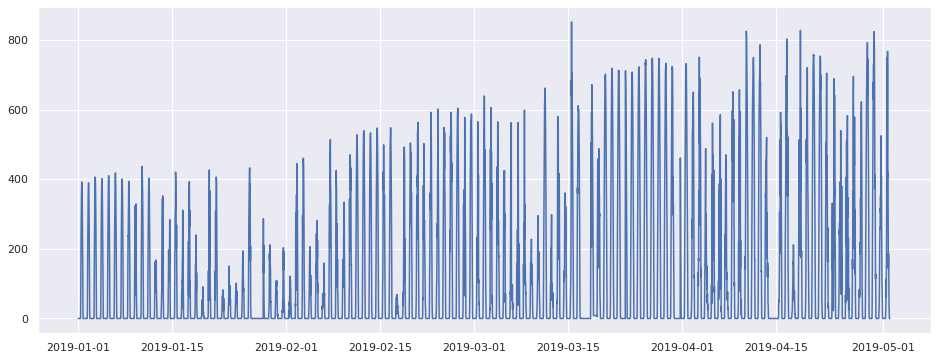

In [18]:
data_train = data_train.loc[:'2019-05-01']

plt.plot(data_train['rad'])
plt.show()

# II Preparación del conjunto de datos para el entrenamiento de una red neuronal recurrente.

In [19]:
import numpy as np
import tensorflow as tf

np.random.seed(1)
tf.random.set_seed(1)

In [20]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    dff = pd.DataFrame(data)
    cols, names = list(), list()
    
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(dff.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(dff.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]

    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    
    return agg

def get_rnn_dataset(data, past_history=10, forecast_horizon=1):
    n_vars = data.shape[1]
    values = series_to_supervised(data, past_history, forecast_horizon).values
    train_X, train_y = values[:, :-1*n_vars*forecast_horizon], values[:, n_vars*past_history+2::n_vars]
    
    return train_X, train_y

In [21]:
one_day_min = 24*60

interval_min = 30
past_day = 7
forecast_day = 1

past_history = int((one_day_min / interval_min) * past_day)
forecast_horizon = int((one_day_min / interval_min) * forecast_day)

print("Past history {0} , {1} day".format(past_history, past_day))
print("Forecast horizon {0} , {1} day".format(forecast_horizon, forecast_day))

Past history 336 , 7 day
Forecast horizon 48 , 1 day


In [22]:
class Scaler:
    def fit(self, data):
        self._min = data.min()
        self._max = data.max()
    
    def normalize(self, data):
        return (data - self._min) / (self._max - self._min)
    
    def denormalize(self, data):
        return data*(self._max-self._min)+self._min

In [23]:
data_test = data_by_station[1]
data_test = data_test.resample('30T').mean().ffill()
data_test = data_test.drop(columns=['prec', 'vvien'])

data_test['day']=[x.day for x in data_test.index]
data_test['month']=[x.month for x in data_test.index]

data_test = data_test.loc[:'2019-05-01']

In [24]:
### TRAIN
tamb_scaler = Scaler()
tamb_scaler.fit(data_train['tamb'])

pres_scaler = Scaler()
pres_scaler.fit(data_train['pres'])

rad_scaler = Scaler()
rad_scaler.fit(data_train['rad'])

weekday_scaler = Scaler()
weekday_scaler.fit(data_train['day'])

month_scaler = Scaler()
month_scaler.fit(data_train['month'])

### TEST
tamb_scaler_t = Scaler()
tamb_scaler_t.fit(data_test['tamb'])

pres_scaler_t = Scaler()
pres_scaler_t.fit(data_test['pres'])

rad_scaler_t = Scaler()
rad_scaler_t.fit(data_test['rad'])

weekday_scaler_t = Scaler()
weekday_scaler_t.fit(data_train['day'])

month_scaler_t = Scaler()
month_scaler_t.fit(data_train['month'])

In [25]:
data_train = data_train.values
data_test = data_test.values

In [26]:
data_train[:, 0] = tamb_scaler.normalize(data_train[:, 0])
data_train[:, 1] = pres_scaler.normalize(data_train[:, 1])
data_train[:, 2] = rad_scaler.normalize(data_train[:, 2])
data_train[:, 3] = weekday_scaler.normalize(data_train[:, 3])
data_train[:, 4] = month_scaler.normalize(data_train[:, 4])


data_test[:, 0] = tamb_scaler_t.normalize(data_test[:, 0])
data_test[:, 1] = pres_scaler_t.normalize(data_test[:, 1])
data_test[:, 2] = rad_scaler_t.normalize(data_test[:, 2])
data_test[:, 3] = weekday_scaler_t.normalize(data_test[:, 3])
data_test[:, 4] = month_scaler_t.normalize(data_test[:, 4])

In [27]:
#from sklearn.preprocessing import MinMaxScaler

In [28]:
#scaler = MinMaxScaler(feature_range=(-1, 1))
#scaler_t = MinMaxScaler(feature_range=(-1, 1))

In [29]:
#data_train = scaler.fit_transform(data_train)
#data_test = scaler_t.fit_transform(data_test)

In [30]:
data_train = series_to_supervised(data_train, past_history, forecast_horizon)
data_test = series_to_supervised(data_test, past_history, forecast_horizon)

In [31]:
in_vars = []

for v in range(1,4):
    for i in range(past_history, 0, -1):
        in_vars.append(('var%d(t-%d)' % (v,i)))


rad_var = []

for i in range(past_history, 0, -1):
    rad_var.append(('var3(t-%d)' % i))
        
day_var = []

for i in range(past_history, 0, -1):
    day_var.append(('var4(t-%d)' % i))
        
month_var = []

for i in range(past_history, 0, -1):
    month_var.append(('var5(t-%d)' % i))

target_var = []

for i in range(0, forecast_horizon):
    if i == 0:
        target_var.append('var3(t)')
    else:
        target_var.append(('var3(t+%d)' % i))

In [32]:
data_train[in_vars]

,var1(t-336),var1(t-335),var1(t-334),var1(t-333),var1(t-332),var1(t-331),var1(t-330),var1(t-329),var1(t-328),var1(t-327),...,var3(t-10),var3(t-9),var3(t-8),var3(t-7),var3(t-6),var3(t-5),var3(t-4),var3(t-3),var3(t-2),var3(t-1)
336,0.371795,0.315385,0.323077,0.328205,0.279487,0.315385,0.356410,0.374359,0.397436,0.389744,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
337,0.315385,0.323077,0.328205,0.279487,0.315385,0.356410,0.374359,0.397436,0.389744,0.392308,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
338,0.323077,0.328205,0.279487,0.315385,0.356410,0.374359,0.397436,0.389744,0.392308,0.402564,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
339,0.328205,0.279487,0.315385,0.356410,0.374359,0.397436,0.389744,0.392308,0.402564,0.374359,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
340,0.279487,0.315385,0.356410,0.374359,0.397436,0.389744,0.392308,0.402564,0.374359,0.320513,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5754,0.358974,0.307692,0.307692,0.307692,0.307692,0.307692,0.307692,0.307692,0.256410,0.256410,...,0.482090,0.412801,0.286553,0.201409,0.118614,0.110981,0.065179,0.032883,0.009395,0.0
5755,0.307692,0.307692,0.307692,0.307692,0.307692,0.307692,0.307692,0.256410,0.256410,0.230769,...,0.412801,0.286553,0.201409,0.118614,0.110981,0.065179,0.032883,0.009395,0.000000,0.0
5756,0.307692,0.307692,0.307692,0.307692,0.307692,0.307692,0.256410,0.256410,0.230769,0.205128,...,0.286553,0.201409,0.118614,0.110981,0.065179,0.032883,0.009395,0.000000,0.000000,0.0
5757,0.307692,0.307692,0.307692,0.307692,0.307692,0.256410,0.256410,0.230769,0.205128,0.205128,...,0.201409,0.118614,0.110981,0.065179,0.032883,0.009395,0.000000,0.000000,0.000000,0.0


In [33]:
data_train[day_var]

,var4(t-336),var4(t-335),var4(t-334),var4(t-333),var4(t-332),var4(t-331),var4(t-330),var4(t-329),var4(t-328),var4(t-327),...,var4(t-10),var4(t-9),var4(t-8),var4(t-7),var4(t-6),var4(t-5),var4(t-4),var4(t-3),var4(t-2),var4(t-1)
336,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.233333,0.233333
337,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.233333,0.233333,0.233333
338,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.233333,0.233333,0.233333,0.233333
339,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.200000,0.200000,0.200000,0.200000,0.200000,0.233333,0.233333,0.233333,0.233333,0.233333
340,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.200000,0.200000,0.200000,0.200000,0.233333,0.233333,0.233333,0.233333,0.233333,0.233333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5754,0.733333,0.733333,0.733333,0.733333,0.766667,0.766667,0.766667,0.766667,0.766667,0.766667,...,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667
5755,0.733333,0.733333,0.733333,0.766667,0.766667,0.766667,0.766667,0.766667,0.766667,0.766667,...,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667
5756,0.733333,0.733333,0.766667,0.766667,0.766667,0.766667,0.766667,0.766667,0.766667,0.766667,...,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667
5757,0.733333,0.766667,0.766667,0.766667,0.766667,0.766667,0.766667,0.766667,0.766667,0.766667,...,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667


In [34]:
data_train[month_var]

,var5(t-336),var5(t-335),var5(t-334),var5(t-333),var5(t-332),var5(t-331),var5(t-330),var5(t-329),var5(t-328),var5(t-327),...,var5(t-10),var5(t-9),var5(t-8),var5(t-7),var5(t-6),var5(t-5),var5(t-4),var5(t-3),var5(t-2),var5(t-1)
336,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
337,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
338,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
339,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
340,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5754,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,...,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75
5755,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,...,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75
5756,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,...,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75
5757,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,...,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75


In [35]:
data_train[target_var]

,var3(t),var3(t+1),var3(t+2),var3(t+3),var3(t+4),var3(t+5),var3(t+6),var3(t+7),var3(t+8),var3(t+9),...,var3(t+38),var3(t+39),var3(t+40),var3(t+41),var3(t+42),var3(t+43),var3(t+44),var3(t+45),var3(t+46),var3(t+47)
336,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
337,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
338,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
339,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
340,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.368761,0.325895,0.168526,0.219612,0.201409,0.136817,0.052261,0.032296,0.024075,0.001762
5755,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.325895,0.168526,0.219612,0.201409,0.136817,0.052261,0.032296,0.024075,0.001762,0.000000
5756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.168526,0.219612,0.201409,0.136817,0.052261,0.032296,0.024075,0.001762,0.000000,0.000000
5757,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219612,0.201409,0.136817,0.052261,0.032296,0.024075,0.001762,0.000000,0.000000,0.000000


In [36]:
#%%time
#data, labels = get_rnn_dataset(data_train, past_history=past_history, forecast_horizon=forecast_horizon)
#data_test, labels_test = get_rnn_dataset(data_test, past_history=past_history, forecast_horizon=forecast_horizon)

In [37]:
data_train.shape, data_test.shape

((5423, 1920), (5425, 1920))

In [38]:
#data = data.reshape((data.shape[0], 1, data.shape[1]))
#data_test = data_test.reshape((data_test.shape[0], 1, data_test.shape[1]))
#data.shape, data_test.shape

In [39]:
#labels

In [40]:
def plot_result(x, y, y_pred=None):
    fig, ax = plt.subplots(1, 1, figsize=(15,5))
    ax.plot(x, 'o-', c='steelblue', ms=3.5, label='History')
    ax.plot([m for m in range(int(x.shape[0]), 
                              int(x.shape[0]+y.shape[0]))], y, 'x-', c='mediumseagreen', ms=3.5, label='Target')
    
    if y_pred is not None:
        ax.plot([m for m in range(int(x.shape[0]), 
                              int(x.shape[0]+y.shape[0]))], y_pred, 'o-', c='salmon', ms=3.5, label='Predict')
        
    ax.legend()

In [41]:
data_train.iloc[0][in_vars].shape

(1008,)

In [42]:
data_train.iloc[0][rad_var].shape

(336,)

In [43]:
data_train.iloc[0][target_var].shape

(48,)

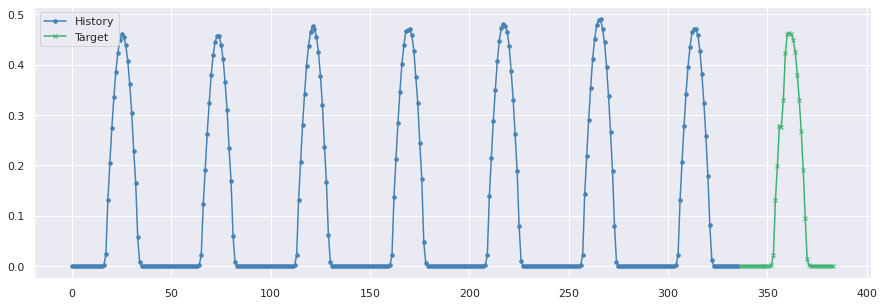

In [44]:
plot_result(data_train.iloc[0][rad_var].values, data_train.iloc[0][target_var].values)

# III Construcción del modelo

In [45]:
import datetime
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Embedding, concatenate, Input
from tensorflow.keras.losses import mae
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

### FF

In [46]:
def make_model(past_history, forecast_horizon):
    emb_dias = 2 #tamanio profundidad de embeddings
    emb_meses = 4

    in_dias = Input(shape=past_history, name = 'dias')
    emb_dias = Embedding(31+1, emb_dias)(in_dias)
    
    in_meses = Input(shape=past_history, name = 'meses')
    emb_meses = Embedding(12+1, emb_meses)(in_meses)

    in_cli = Input(shape=past_history*3, name = 'cli')

    fe = concatenate([(emb_dias), (emb_meses)])

    x = Flatten()(fe)
    x = concatenate([(x), (in_cli)])
    x = Dense(512,activation='sigmoid')(x)
    x = Dense(256,activation='sigmoid')(x)
    
    outp = Dense(forecast_horizon,activation='sigmoid')(x)
    
    model = Model(inputs=[in_dias,in_meses,in_cli], outputs=outp)

    model.compile(loss='mae', optimizer='adam')

    model.summary()
    return model

In [47]:
model = make_model(past_history, forecast_horizon)

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
dias (InputLayer)               [(None, 336)]        0                                            
__________________________________________________________________________________________________
meses (InputLayer)              [(None, 336)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 336, 2)       64          dias[0][0]                       
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 336, 4)       52          meses[0][0]                      
_______________________________________________________________________________________

In [48]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)
earlyStopping = EarlyStopping(monitor='val_loss', mode='min', patience=10, restore_best_weights=True)

In [49]:
%%time
history = model.fit([data_train[day_var].values, data_train[month_var].values, data_train[in_vars].values], 
                    data_train[target_var].values, epochs=100, 
                    validation_data=(
                        [data_test[day_var].values, data_test[month_var].values, data_test[in_vars].values], 
                        data_test[target_var].values
                    ), 
                    verbose=0, callbacks=[earlyStopping, tensorboard_callback])

Instructions for updating:
use `tf.profiler.experimental.stop` instead.
CPU times: user 6min 39s, sys: 3min 53s, total: 10min 33s
Wall time: 3min 3s


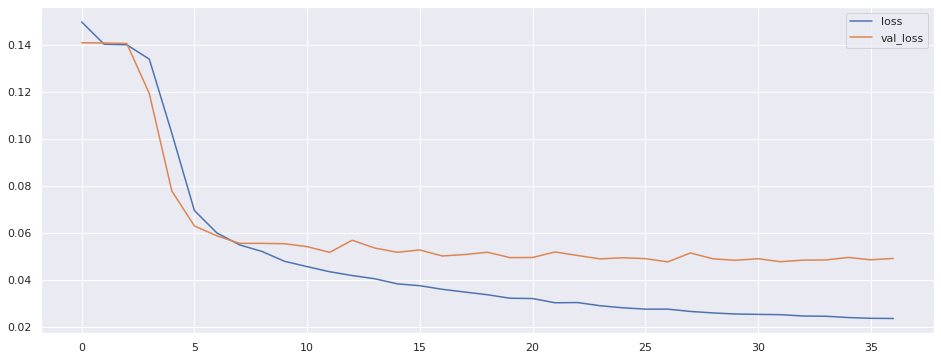

In [50]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [51]:
%%time
y_pred = model.predict([data_test[day_var].values, data_test[month_var].values, data_test[in_vars].values])

CPU times: user 3.03 s, sys: 1.96 s, total: 4.99 s
Wall time: 1.83 s


MAE: 48.95309829711914


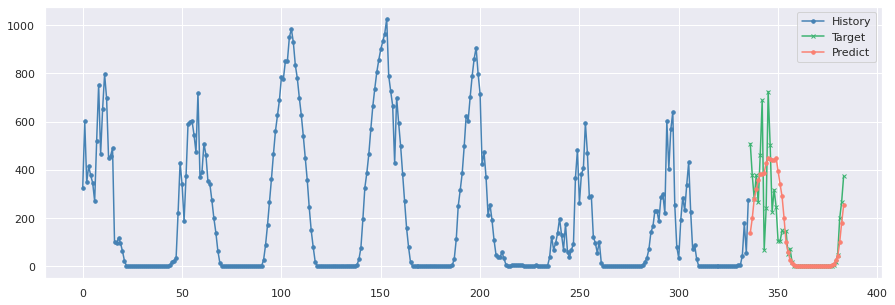

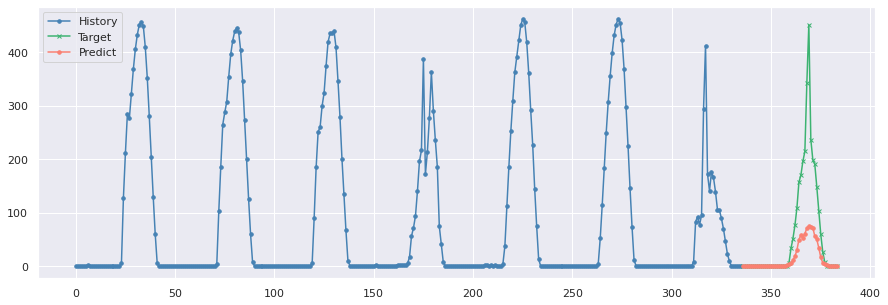

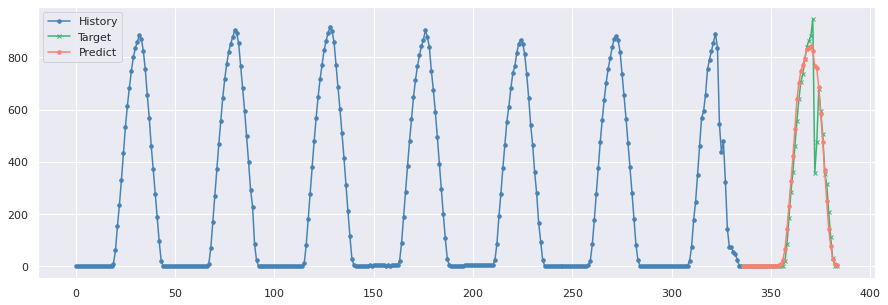

In [52]:
yp = rad_scaler_t.denormalize(y_pred)
y = rad_scaler_t.denormalize(data_test[target_var].values)
x = rad_scaler_t.denormalize(data_test[rad_var].values)

error = np.mean(mae(y, yp))

print("MAE: {}".format(error))

for _ in range(3):
    i = np.random.randint(len(data_test))
    plot_result(x[i], y[i], yp[i])

In [53]:
model.save('models/embedding_512.h5')

In [54]:
err = mae(y, yp)

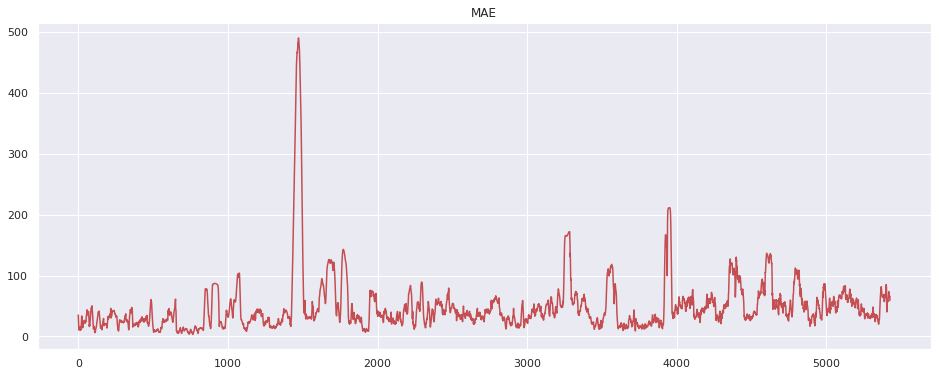

In [59]:
plt.title('MAE')
plt.plot(err, c='r')
plt.show()